# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
# get_ipython().run_line_magic('matplotlib', 'inline')

# Reading Input files

In [3]:
iris_df_orig = pd.read_csv("Iris.csv", header=None)
robot1_df_orig = pd.read_csv("Robot1", header=None, delim_whitespace=True)
robot2_df_orig = pd.read_csv("Robot2", header=None, delim_whitespace=True)

In [4]:
np.random.seed(10)

In [5]:
iris_df_orig.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,6.3,3.3,6.0,2.5,Iris-virginica
2,5.0,3.0,1.6,0.2,Iris-setosa
3,6.2,2.8,4.8,1.8,Iris-virginica
4,6.4,3.1,5.5,1.8,Iris-virginica


# Adding column headers

In [6]:
iris_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df_orig.columns = iris_cols
iris_df_orig.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,6.3,3.3,6.0,2.5,Iris-virginica
2,5.0,3.0,1.6,0.2,Iris-setosa
3,6.2,2.8,4.8,1.8,Iris-virginica
4,6.4,3.1,5.5,1.8,Iris-virginica


In [7]:
robot_cols = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
robot1_df_orig.columns = robot_cols
robot2_df_orig.columns = robot_cols

In [8]:
#robot1
robot1_df_orig.head()

,class,a1,a2,a3,a4,a5,a6,id
0,1,1,1,1,1,3,1,data_5
1,1,1,1,1,1,3,2,data_6
2,1,1,1,1,3,2,1,data_19
3,1,1,1,1,3,3,2,data_22
4,1,1,1,2,1,2,1,data_27


### Dropping "id" column from robot dataset

In [9]:
robot1_df = robot1_df_orig.drop(columns=['id'])
robot2_df = robot2_df_orig.drop(columns=['id'])

# Data exploration

In [10]:
iris_df_orig.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,6.3,3.3,6.0,2.5,Iris-virginica
2,5.0,3.0,1.6,0.2,Iris-setosa
3,6.2,2.8,4.8,1.8,Iris-virginica
4,6.4,3.1,5.5,1.8,Iris-virginica


In [11]:
robot1_df.describe()

,class,a1,a2,a3,a4,a5,a6
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.500000,1.935484,2.096774,1.475806,2.008065,2.556452,1.548387
std,0.502028,0.813923,0.810694,0.501440,0.831259,1.128366,0.499672
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,0.500000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000
75%,1.000000,3.000000,3.000000,2.000000,3.000000,4.000000,2.000000
max,1.000000,3.000000,3.000000,2.000000,3.000000,4.000000,2.000000


In [12]:
robot1_df['a6'].unique()

array([1, 2])

In [13]:
robot2_df.describe()

,class,a1,a2,a3,a4,a5,a6
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,0.491803,1.885246,2.016393,1.467213,2.032787,2.475410,1.516393
std,0.501994,0.815113,0.812949,0.500981,0.832545,1.137004,0.501792
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
75%,1.000000,3.000000,3.000000,2.000000,3.000000,3.750000,2.000000
max,1.000000,3.000000,3.000000,2.000000,3.000000,4.000000,2.000000


## One Hot Encoding the categorical columns(all except the output label) in Robots Dataset

In [14]:
# robot1_df_encoded = pd.get_dummies(robot1_df, columns=['a1', 'a2', 'a3', 'a4', 'a5', 'a6'])
robot1_df_encoded = pd.get_dummies(robot1_df, columns=['a1', 'a2', 'a3', 'a4', 'a5', 'a6'])
robot2_df_encoded = pd.get_dummies(robot2_df, columns=['a1', 'a2', 'a3', 'a4', 'a5', 'a6'])

In [15]:
robot1_df_encoded.head()

,class,a1_1,a1_2,a1_3,a2_1,a2_2,a2_3,a3_1,a3_2,a4_1,a4_2,a4_3,a5_1,a5_2,a5_3,a5_4,a6_1,a6_2
0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1
2,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
4,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0


In [16]:
robot2_df['class'].value_counts()

0    62
1    60
Name: class, dtype: int64

# Scaling columns 

In [17]:
iris_df_scaled = iris_df_orig

In [18]:
iris_df_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,6.3,3.3,6.0,2.5,Iris-virginica
2,5.0,3.0,1.6,0.2,Iris-setosa
3,6.2,2.8,4.8,1.8,Iris-virginica
4,6.4,3.1,5.5,1.8,Iris-virginica


## Factorizing output labels for Iris Dataset

In [19]:
labels, uniques = pd.factorize(iris_df_scaled['class'])
iris_df_scaled['class'] = labels
iris_df_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,6.3,3.3,6.0,2.5,1
2,5.0,3.0,1.6,0.2,0
3,6.2,2.8,4.8,1.8,1
4,6.4,3.1,5.5,1.8,1


In [20]:
iris_df_scaled['class'].value_counts()

2    46
1    45
0    44
Name: class, dtype: int64

# Splitting data into train(80%) and validation(20%)

In [21]:
def splitData(X ,Y, test_size, random_state = 10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 ,random_state = random_state)
    return (X_train, X_test, y_train, y_test)

In [22]:
# iris_train_X, iris_val_X, iris_train_Y, iris_val_Y = split_test_train1(iris_df_scaled.iloc[:,iris_df_scaled.columns != 'class'], iris_df_scaled['class'])

In [23]:
iris_train_X, iris_val_X, iris_train_Y, iris_val_Y = splitData(iris_df_scaled.iloc[:,iris_df_scaled.columns != 'class'], iris_df_scaled['class'], test_size=0.2)
robot1_train_X, robot1_val_X, robot1_train_Y, robot1_val_Y = splitData(robot1_df_encoded.iloc[:,robot1_df_encoded.columns != 'class'], robot1_df_encoded['class'], test_size=0.2)
robot2_train_X, robot2_val_X, robot2_train_Y, robot2_val_Y = splitData(robot2_df_encoded.iloc[:,robot2_df_encoded.columns != 'class'], robot2_df_encoded['class'], test_size=0.2)

In [24]:
robot1_val_X.head()

,a1_1,a1_2,a1_3,a2_1,a2_2,a2_3,a3_1,a3_2,a4_1,a4_2,a4_3,a5_1,a5_2,a5_3,a5_4,a6_1,a6_2
61,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0
45,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
39,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0
63,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0
115,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1


In [25]:
iris_train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
67,5.8,2.8,5.1,2.4
19,6.3,2.5,5.0,1.9
14,5.4,3.9,1.7,0.4
59,5.8,2.7,3.9,1.2
39,7.7,3.0,6.1,2.3


In [26]:
np.unique(iris_val_X, return_counts=True)

(array([0.2, 0.4, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 1.9, 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.7,
        3.8, 4.2, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.7, 6.8, 6.9, 7.1]),
 array([6, 1, 1, 1, 1, 2, 4, 6, 5, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 7, 3,
        3, 1, 5, 1, 1, 2, 1, 4, 1, 3, 4, 1, 3, 1, 1, 1, 2, 1, 1, 1, 3, 3,
        4, 1, 1, 1, 2, 1, 1, 1]))

# Util Functions

#### Euclidean distance

In [27]:
def euclidean(row1, row2):
    if(len(row1) != len(row2)):
        raise ValueError('row lengths do not match in euclidean dist calculation!')
    return np.sqrt(np.sum([(x-y)**2 for x, y in zip(row1,row2)]))

def chebyshev(row1, row2):
    if(len(row1) != len(row2)):
        raise ValueError('row lengths do not match in chebyshev dist calculation!')
    return np.max([abs(x-y) for x, y in zip(row1,row2)])

def manhattan(row1, row2):
    if(len(row1) != len(row2)):
        raise ValueError('row lengths do not match in manhattan dist calculation!')
    return np.sum([abs(x-y) for x, y in zip(row1,row2)])

def minkowski(row1, row2):
    if(len(row1) != len(row2)):
        raise ValueError('row lengths do not match in minkowski dist calculation!')
    x = np.cbrt(np.sum([abs(x-y)**3 for x, y in zip(row1,row2)]))
#     print(x)
    return x

In [28]:
def print_metrics(Y_predict, Y_test):
    accuracy = metrics.accuracy_score(Y_test, Y_predict)
    precision = metrics.precision_score(Y_test, Y_predict, pos_label=1, average='macro')
    recall = metrics.recall_score(Y_test, Y_predict,pos_label=1, average='macro')
    f1_score = metrics.f1_score(Y_test, Y_predict,pos_label=1, average='macro')
    print("Accuracy : " +str(accuracy))
    print("Precision : " +str(precision))
    print("recall : " +str(recall))
    print("f1 Score : " +str(f1_score))
    print()

In [29]:
def calc_metrics(Y_predict, Y_test):
    accuracy = metrics.accuracy_score(Y_test, Y_predict)
    precision = metrics.precision_score(Y_test, Y_predict, pos_label=1, average='macro')
    recall = metrics.recall_score(Y_test, Y_predict,pos_label=1, average='macro')
    f1_score = metrics.f1_score(Y_test, Y_predict,pos_label=1, average='macro')
    return [accuracy, precision, recall, f1_score]

# My KNN

In [30]:
class KNN:
    def __init__(self, n_neighbors=5, metric=euclidean):
        self.n_neighbors = n_neighbors
        self.metric = metric
        
    def fit(self, X, Y):
        self.scaler = MinMaxScaler()
        self.scaler = self.scaler.fit(X)
        self.train_X = pd.DataFrame(self.scaler.transform(X), columns=X.columns)
#         self.train_X = X
        self.train_Y = Y

    def scalerFit(self, df):
        scaler = MinMaxScaler()
        scaler.fit(df)
        return scaler

    def transform(self, scalar, df, cols):
        df_scaled = pd.DataFrame(scaler.transform(df[cols]), columns=cols)
        return df_scaled

    def predict_row(self, row):
        dists = []
        index = 0
        for i, train_row in self.train_X.iterrows():
            dist = self.metric(row, train_row)
            label = self.train_Y.iloc[index]
            dists.append((dist,label))
            index += 1
        dists.sort()
        dists = dists[:self.n_neighbors]
        elem,count = np.unique([j for (i,j) in dists], return_counts=True)
        return elem[np.argmax(count)]
    
    def predict(self, X):
        X = pd.DataFrame(self.scaler.transform(X), columns=X.columns)
        y = []
        for index, row in X.iterrows():
            y.append(self.predict_row(row))
        return y

### Model Fit

In [31]:
iris_X_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_Y_cols = ['class']
myKNN = KNN(n_neighbors=2, metric=euclidean)
myKNN.fit(iris_train_X, iris_train_Y)

### Model Predication

In [32]:
iris_pred_Y = myKNN.predict(iris_val_X)
# iris_pred_Y

### Printing Metrics

In [38]:
print("For Iris Dataset")
print_metrics(iris_pred_Y,iris_val_Y)

For Iris Dataset
Accuracy : 0.9259259259259259
Precision : 0.9267399267399267
recall : 0.9267399267399267
f1 Score : 0.9267399267399267



In [39]:
iris_X_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_Y_cols = ['class']
myKNN = KNN(5, metric=euclidean)
myKNN.fit(robot1_train_X, robot1_train_Y)
robot1_pred_Y = myKNN.predict(robot1_val_X)
print("For Robot1 Dataset")
print_metrics(robot1_pred_Y,robot1_val_Y)

For Robot1 Dataset
Accuracy : 0.76
Precision : 0.8333333333333333
recall : 0.7692307692307692
f1 Score : 0.75



In [40]:
iris_X_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_Y_cols = ['class']
myKNN = KNN(5, metric=euclidean)
myKNN.fit(robot2_train_X, robot2_train_Y)
robot2_pred_Y = myKNN.predict(robot2_val_X)
print("For Robot2 Dataset")
print_metrics(robot2_pred_Y,robot2_val_Y)

For Robot2 Dataset
Accuracy : 0.68
Precision : 0.8260869565217391
recall : 0.6
f1 Score : 0.5614035087719298



## Evaluation for all 3 datasets

In [41]:
### Creating single source for data
datasets = ['iris', 'robot1', 'robot2']
X_trains = [iris_train_X, robot1_train_X, robot2_train_X]
Y_trains = [iris_train_Y, robot1_train_Y, robot2_train_Y]
X_vals = [iris_val_X, robot1_val_X, robot2_val_X]
Y_vals = [iris_val_Y, robot1_val_Y, robot2_val_Y]

all_data = zip(datasets, X_trains, Y_trains, X_vals, Y_vals)

In [42]:
all_data = list(all_data)

In [43]:
## Creating a metric dataframe
metric_cols = ['Metric', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
metric_df = pd.DataFrame(columns = metric_cols)

In [44]:
# Calculating metrics for all datasets
def evaluate_metric_dataframe(datasets1, model):
    metric_cols = ['DataSet', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    metric_df = pd.DataFrame(columns = metric_cols)
    for data in datasets1:
        model.fit(data[1], data[2])
        pred_Y = model.predict(data[3])
        scores = calc_metrics(pred_Y, data[4])
        metric_df = metric_df.append(pd.DataFrame([[data[0]] + scores], columns=metric_cols),ignore_index=True)
    return metric_df

In [45]:
metric_df = evaluate_metric_dataframe(all_data, myKNN)

In [47]:
print("For K = 5")
metric_df

For K = 5


,DataSet,Accuracy,Precision,Recall,F1 Score
0,iris,1.00,1.000000,1.000000,1.000000
1,robot1,0.76,0.833333,0.769231,0.750000
2,robot2,0.68,0.826087,0.600000,0.561404


## Q1-1 Comparing metrics with sklearn

In [48]:
from sklearn.neighbors import KNeighborsClassifier
def compareSklearnWithK(data):
    plt.figure(1, figsize=(14,10))
    n_neighbour = [i for i in range(1, 12)]
    metrics = []
    sk_metrics = []
    titles = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    for i in range(1,12):
        model = KNN(i)
#         print(data[1], data[2])
        model.fit(data[1], data[2])
        pred_Y = model.predict(data[3])
        metrics.append(calc_metrics(pred_Y,data[4]))

        neigh = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
        neigh.fit(data[1], data[2]) 
        sklearn_pred = neigh.predict(data[3])
        sk_metrics.append(calc_metrics(sklearn_pred, data[4]))
    
    temp = np.array(metrics).T
    temp_sk = np.array(sk_metrics).T
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        ax.plot(n_neighbour, temp[i], label="myKNN")
        ax.plot(n_neighbour, temp_sk[i], label="sklearn KNN")
        ax.set_ylim(ymin=0)
        ax.legend(loc='best')
        ax.set_xlabel("No. of neighbours")
        ax.set_ylabel(titles[i])
#         ax.set_title(titles[i])
    plt.show(ax)

For iris Dataset


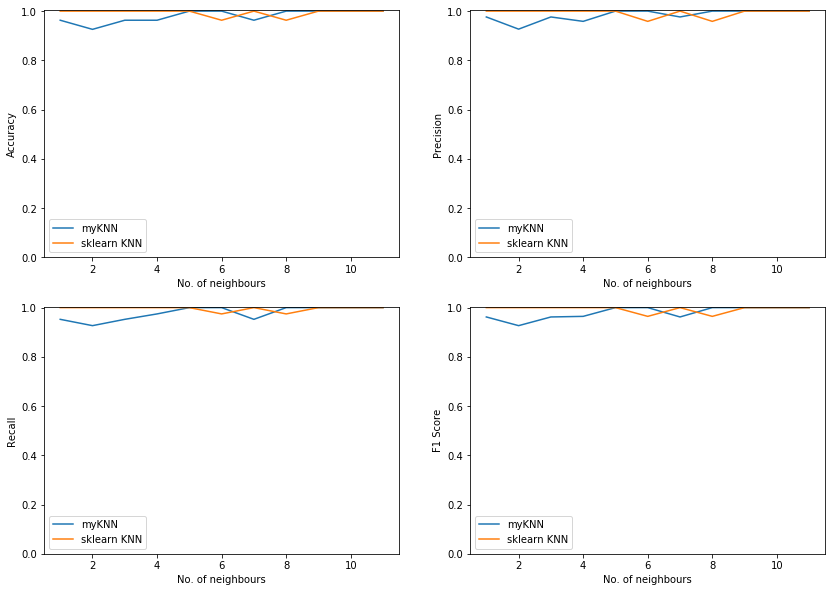

For robot1 Dataset


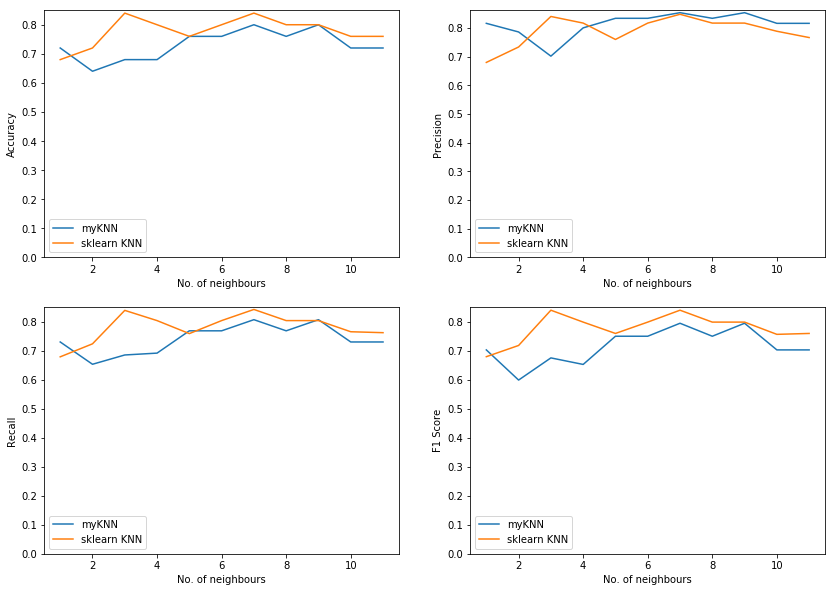

For robot2 Dataset


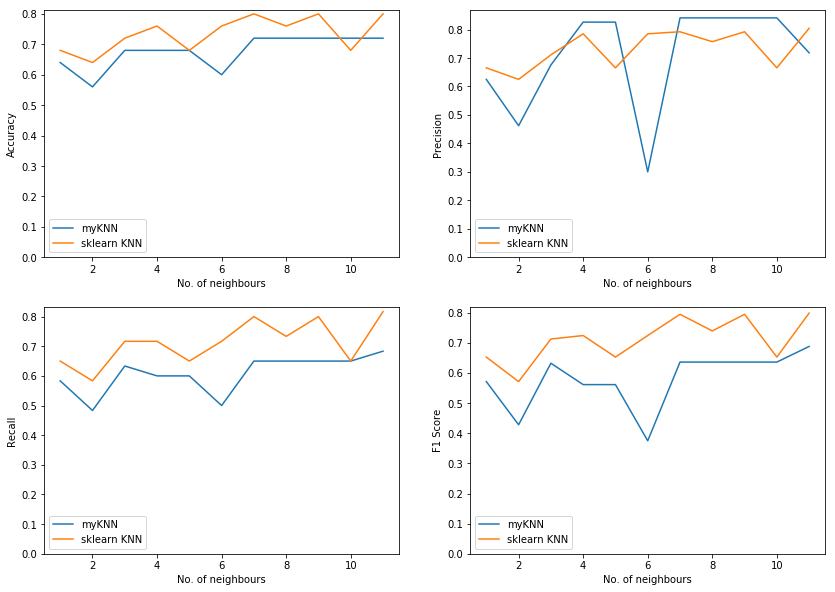

In [49]:
for i in range(len(all_data)):
    print("For {0} Dataset".format(all_data[i][0]))
    compareSklearnWithK(all_data[i])
    print("======================================================================================================")

## Q1-2 Plot graph to report accuracy with change in value of K.

In [50]:
def plotAccuracywithK(datasets, distance_metrics):
    plt.figure(1, figsize=(14,10))
    n_neighbour = [i for i in range(1, 12)]
    titles = []
    for metric in distance_metrics:
        metric_acc = []
        for data in datasets:
            if(len(titles) < len(datasets)):
                titles.append(data[0])
            accuracy = []
            for i in range(1,12):
                model = KNN(i, metric=metric)
                model.fit(data[1], data[2])
                pred_Y = model.predict(data[3])
                accuracy.append(metrics.accuracy_score(pred_Y,data[4]))
            metric_acc.append(accuracy)
        for i in range(len(metric_acc)):
            ax = plt.subplot(2, 2, i + 1)
            ax.plot(n_neighbour, metric_acc[i], label=metric.__name__)
            ax.legend(loc='best')
            ax.set_xlabel("No. of neighbours")
            ax.set_ylabel("Accuracy")
            ax.set_ylim(ymin=0)
            ax.set_title(titles[i])
    plt.show(ax)

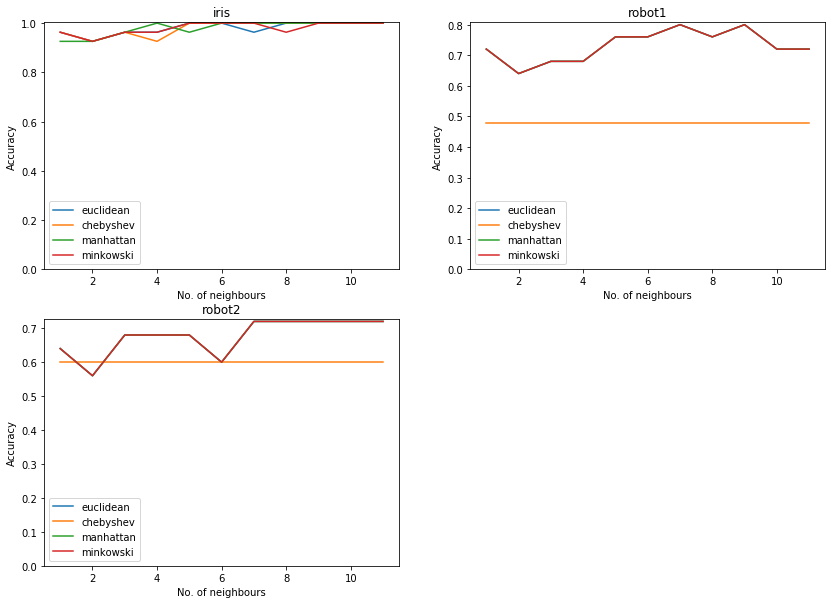

In [51]:
dist_metrics = [euclidean, chebyshev, manhattan, minkowski]
plotAccuracywithK(all_data, dist_metrics)

## Observations: 
1. As we increase K, the no. of the neighbours which vote increase which results in more smooth splitting of the boundary(rather than a zig zag manner), hence a possibility for a better prediction

## Evaluation with Sklearn KNN

### Model Fit

In [52]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
neigh.fit(iris_train_X, iris_train_Y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Model Prediction

In [53]:
sklearn_iris_pred = neigh.predict(iris_val_X)

### Printing Metrics

In [54]:
print_metrics(sklearn_iris_pred, iris_val_Y)

Accuracy : 1.0
Precision : 1.0
recall : 1.0
f1 Score : 1.0



In [55]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(robot1_train_X, robot1_train_Y) 
sklearn_robot1_pred = neigh.predict(robot1_val_X)
print_metrics(sklearn_robot1_pred, robot1_val_Y)

Accuracy : 0.76
Precision : 0.7596153846153846
recall : 0.7596153846153846
f1 Score : 0.7596153846153846



In [56]:
metric_df = evaluate_metric_dataframe(all_data, neigh)

In [57]:
metric_df

,DataSet,Accuracy,Precision,Recall,F1 Score
0,iris,1.00,1.000000,1.000000,1.000000
1,robot1,0.76,0.759615,0.759615,0.759615
2,robot2,0.68,0.665441,0.650000,0.652778


# PART - 2 (Naive Bayes)

## Reading Input

In [58]:
loan_df = pd.read_csv("LoanDataset/data.csv", header=None)

In [59]:
loan_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,25,1.1,49,91107,4,1.6,1.2,0,0.1,1.3,0.2,0.3,0.4
1,2701,31,5.0,39,94590,4,2.2,2.0,0,0.0,0.0,0.0,1.0,1.0
2,2716,42,18.0,54,90089,1,1.8,1.0,0,0.0,0.0,0.0,1.0,0.0
3,3359,59,35.0,40,94536,4,0.4,1.0,0,0.0,0.0,0.0,0.0,0.0
4,2492,38,14.0,80,92868,2,2.7,1.0,0,0.0,0.0,0.0,1.0,0.0


In [60]:
loan_cols = ['ID', 'age', 'no_of_year_of_exp', 'annual_income', 'zip', 'family_size',
 'average_spending', 'education_level', 'mortgage_value', 'class',
 'security_account', 'certificate_of_deposit', 'internet_banking',
 'credit_card']

In [61]:
loan_df.columns = loan_cols

In [62]:
loan_df.head()

,ID,age,no_of_year_of_exp,annual_income,zip,family_size,average_spending,education_level,mortgage_value,class,security_account,certificate_of_deposit,internet_banking,credit_card
0,1,25,1.1,49,91107,4,1.6,1.2,0,0.1,1.3,0.2,0.3,0.4
1,2701,31,5.0,39,94590,4,2.2,2.0,0,0.0,0.0,0.0,1.0,1.0
2,2716,42,18.0,54,90089,1,1.8,1.0,0,0.0,0.0,0.0,1.0,0.0
3,3359,59,35.0,40,94536,4,0.4,1.0,0,0.0,0.0,0.0,0.0,0.0
4,2492,38,14.0,80,92868,2,2.7,1.0,0,0.0,0.0,0.0,1.0,0.0


## Data Exploration/Cleaning

In [63]:
loan_df.describe()

,ID,age,no_of_year_of_exp,annual_income,zip,family_size,average_spending,education_level,mortgage_value,class,security_account,certificate_of_deposit,internet_banking,credit_card
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,2495.644889,45.369333,20.134022,73.993111,93136.413778,2.397333,1.938638,1.882711,56.447556,0.096467,0.106511,0.060711,0.601844,0.292533
std,1442.159359,11.461700,11.462749,45.957649,2159.460855,1.145317,1.745781,0.840164,101.773302,0.295229,0.308665,0.238752,0.489525,0.454918
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1249.750000,35.000000,10.000000,39.000000,91902.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2494.500000,45.000000,20.000000,64.000000,93405.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3748.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.300000,1.000000,1.000000,1.000000


### Checking if family size is float

In [64]:
loan_df.loc[loan_df['family_size'] != loan_df.family_size.astype(int)]

,ID,age,no_of_year_of_exp,annual_income,zip,family_size,average_spending,education_level,mortgage_value,class,security_account,certificate_of_deposit,internet_banking,credit_card


### Checking if work exp < 0

In [65]:
loan_df = loan_df.loc[loan_df['no_of_year_of_exp'] >= 0]

### Checking if output label is other than 0 or 1

In [66]:
loan_df = loan_df.loc[(loan_df['class'] == 0) | (loan_df['class'] == 1)]

### Checking if education level is other than 1/2/3

In [67]:
loan_df = loan_df.loc[(loan_df['education_level'] == 1) | (loan_df['education_level'] == 2) | (loan_df['education_level'] == 3)]

### Checking if mortgage value is < 0

In [68]:
loan_df = loan_df.loc[loan_df['mortgage_value'] >= 0]

### Checking if categorical cols is other than 0 or 1

In [69]:
loan_cat_cols = ['security_account', 'certificate_of_deposit', 'internet_banking', 'credit_card']
for col in loan_cat_cols:
    loan_df = loan_df.loc[(loan_df[col] == 0) | (loan_df[col] == 1)]

In [70]:
loan_df.describe()

,ID,age,no_of_year_of_exp,annual_income,zip,family_size,average_spending,education_level,mortgage_value,class,security_account,certificate_of_deposit,internet_banking,credit_card
count,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000
mean,2494.431201,45.579349,20.351515,74.012570,93136.171717,2.392144,1.936575,1.880808,56.568575,0.097419,0.106173,0.061279,0.602469,0.292705
std,1441.997121,11.325289,11.313049,46.031854,2164.242858,1.145649,1.746668,0.839862,101.856491,0.296560,0.308093,0.239869,0.489442,0.455055
min,2.000000,24.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1251.500000,36.000000,11.000000,39.000000,91902.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2489.000000,46.000000,20.000000,64.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3744.000000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
loan_df.head()

,ID,age,no_of_year_of_exp,annual_income,zip,family_size,average_spending,education_level,mortgage_value,class,security_account,certificate_of_deposit,internet_banking,credit_card
1,2701,31,5.0,39,94590,4,2.2,2.0,0,0.0,0.0,0.0,1.0,1.0
2,2716,42,18.0,54,90089,1,1.8,1.0,0,0.0,0.0,0.0,1.0,0.0
3,3359,59,35.0,40,94536,4,0.4,1.0,0,0.0,0.0,0.0,0.0,0.0
4,2492,38,14.0,80,92868,2,2.7,1.0,0,0.0,0.0,0.0,1.0,0.0
5,937,62,32.0,19,92109,1,1.5,3.0,0,0.0,1.0,0.0,0.0,0.0


In [72]:
loan_df['class'].value_counts()

0.0    4021
1.0     434
Name: class, dtype: int64

### Dropping ID and ZIP columns

In [73]:
loan_df.index = loan_df['ID']
loan_df = loan_df.drop(columns=['ID', 'zip'])

### Oversampling as the class counts are skewed up

In [74]:
from imblearn.over_sampling import SMOTE, ADASYN
loan_X_resampled, loan_y_resampled = SMOTE().fit_resample(loan_df.iloc[:,loan_df.columns != 'class'], loan_df['class'])

In [75]:
temp_df_X = pd.DataFrame(data=loan_X_resampled, columns=['age', 'no_of_year_of_exp', 'annual_income', 'family_size','average_spending', 'education_level', 'mortgage_value', 'security_account', 'certificate_of_deposit', 'internet_banking','credit_card'])
temp_df_Y = pd.Series(loan_y_resampled, name='class')
temp_df_Y.index = temp_df_X.index
temp_df_X['class'] = temp_df_Y.values
temp_df_X.head()

,age,no_of_year_of_exp,annual_income,family_size,average_spending,education_level,mortgage_value,security_account,certificate_of_deposit,internet_banking,credit_card,class
0,31.0,5.0,39.0,4.0,2.2,2.0,0.0,0.0,0.0,1.0,1.0,0.0
1,42.0,18.0,54.0,1.0,1.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,59.0,35.0,40.0,4.0,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38.0,14.0,80.0,2.0,2.7,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,62.0,32.0,19.0,1.0,1.5,3.0,0.0,1.0,0.0,0.0,0.0,0.0


### Splitting data into train(80%) and validation(20%)

In [76]:
X_columns=['age', 'no_of_year_of_exp', 'annual_income', 'family_size','average_spending', 'education_level', 'mortgage_value', 'security_account', 'certificate_of_deposit', 'internet_banking','credit_card']
Y_columns=['class']
loan_train_X, loan_val_X, loan_train_Y, loan_val_Y = splitData(temp_df_X.iloc[:,temp_df_X.columns != 'class'], temp_df_X['class'], test_size=0.2)
# loan_train_X, loan_val_X, loan_train_Y, loan_val_Y = splitData(loan_df.iloc[:,loan_df.columns != 'class'], loan_df['class'], test_size=0.2)

In [77]:
loan_val_Y.head()

3223    0.0
4514    1.0
6673    1.0
5331    1.0
6005    1.0
Name: class, dtype: float64

## Helper Functions

In [78]:
def evalColProbs(X):
    out_probs = defaultdict(float)
    for key in X:
        out_probs[key] += 1
    Y_probs_tot = sum(out_probs.values())
    for k, v in out_probs.items():
        out_probs[k] = v/Y_probs_tot
    return out_probs

def evalNumericXYProbs(x, mean_col, var_col):
    x = pow(math.e,-((x-mean_col)**2)/(var_col**2))/np.sqrt(2*math.pi*var_col)
    return x

## My Naive Bayes Classifier

In [79]:
class MyNaiveBayes:
    def __init__(self):
        pass
    
    def fit(self, X, Y, numerical_cols, categorical_cols):
        self.numerical_cols = numerical_cols
        self.categorical_cols = categorical_cols
        data = X.join(Y)
        self.mean_df = data.mean()
        self.var_df = data.var()
        self.Y_probs = defaultdict(float)
        for key in Y:
            self.Y_probs[key] += 1
        Y_probs_tot = sum(self.Y_probs.values())
        for k, v in self.Y_probs.items():
            self.Y_probs[k] = v/Y_probs_tot
        self.X_probs = {}
        for col in categorical_cols:
            self.X_probs[col] = evalColProbs(X[col])
        self.X_Y_probs = {}
        for val, temp_df in data.groupby(Y.name):
            self.X_Y_probs[val] = {}
            for col in categorical_cols:
                self.X_Y_probs[val][col] = evalColProbs(temp_df[col])
        
    def predict(self, X):
        pred = []
        for index, row in X.iterrows():
            res = {}
            for Y_val in self.Y_probs:
                prob = 1
                for col in self.categorical_cols:
                    prob *= self.X_Y_probs[Y_val][col][row[col]]
                for col in self.numerical_cols:
                    prob *= evalNumericXYProbs(row[col], self.mean_df[col], self.var_df[col])#/self.X_probs[col][row[col]]
                prob *= self.Y_probs[Y_val]
                res[Y_val] = prob
            pred.append(max(res.keys(), key=(lambda k: res[k])))
        return pred

In [80]:
nb = MyNaiveBayes()

In [81]:
loan_cat_cols =  ['education_level', 'security_account', 'certificate_of_deposit', 'internet_banking','credit_card']
loan_numeric_cols = ['age', 'no_of_year_of_exp', 'annual_income', 'family_size', 'average_spending',  'mortgage_value']

nb.fit(loan_train_X, loan_train_Y, loan_numeric_cols, loan_cat_cols)

In [82]:
y_pred = nb.predict(loan_val_X)

# Q2 Report your observations and accuracy of the Naive Bayes model

In [83]:
print_metrics(y_pred, loan_val_Y)

Accuracy : 0.9129894344313239
Precision : 0.9276859504132231
recall : 0.910371318822023
f1 Score : 0.9117980572549094



### Observations:
1. Since the number of 1s are very less compared to the no. of 0s in the output label in the Bank Dataset, oversampling, using SMOTE method was done to create a balanced dataset
2. After oversampling recall, precision, f1 improved significantly on the validation dataset (from ~60% to ~90%)
3. Cleaning of data was done to remove illogical data. Ex: class not in (0,1), work exp < 0, mortgage val < 0, etc (comments added above wherever done)
4. Columns ID and ZIP were dropped as they could not be used for prediction, although ZIP if converted to latitude and longitude can be used to get a valuable feature

### Accuracy metrics on validation dataset:
1. Accuracy : 0.9055313859540087
2. Precision : 0.9194061505832449
3. recall : 0.9070904645476773
4. f1 Score : 0.9049577655701571

# PART 3 - Linear Regression

## Reading Input

In [84]:
admission_orig_df = pd.read_csv("AdmissionDataset/data.csv")

In [85]:
admission_orig_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


In [86]:
admission_orig_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,247.726667,316.542222,107.162222,3.126667,3.361111,3.468889,8.577600,0.553333,0.720889
std,144.927656,11.335705,6.023554,1.140254,0.993374,0.919432,0.599454,0.497701,0.141398
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,7.200000,0.000000,0.340000
25%,124.250000,308.250000,103.000000,2.000000,2.500000,3.000000,8.122500,0.000000,0.630000
50%,246.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,373.750000,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [87]:
admission_orig_cols = ['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']
admission_orig_df.columns = admission_orig_cols

## Data Exploration

In [88]:
admission_orig_df.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


In [89]:
admission_orig_df[admission_orig_df['GRE_Score'] != admission_orig_df.GRE_Score.astype(int)]

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit


In [90]:
corr = admission_orig_df.corr()
corr

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial_No,1.000000,-0.080196,-0.115323,-0.027499,-0.108152,0.010717,-0.061309,0.010068,0.023551
GRE_Score,-0.080196,1.000000,0.821423,0.631178,0.616670,0.535315,0.826544,0.562533,0.810894
TOEFL_Score,-0.115323,0.821423,1.000000,0.642612,0.648256,0.544411,0.810381,0.471452,0.790005
University_Rating,-0.027499,0.631178,0.642612,1.000000,0.722434,0.614527,0.696721,0.437424,0.685563
SOP,-0.108152,0.616670,0.648256,0.722434,1.000000,0.664015,0.713633,0.403552,0.681585
LOR,0.010717,0.535315,0.544411,0.614527,0.664015,1.000000,0.640347,0.392998,0.644693
CGPA,-0.061309,0.826544,0.810381,0.696721,0.713633,0.640347,1.000000,0.507005,0.877802
Research,0.010068,0.562533,0.471452,0.437424,0.403552,0.392998,0.507005,1.000000,0.557906
Chance_of_Admit,0.023551,0.810894,0.790005,0.685563,0.681585,0.644693,0.877802,0.557906,1.000000


In [91]:
# Dropping Serial Number
admission_df = admission_orig_df.drop(columns=['Serial_No'])

In [92]:
corr = admission_df.corr()
corr

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE_Score,1.000000,0.821423,0.631178,0.616670,0.535315,0.826544,0.562533,0.810894
TOEFL_Score,0.821423,1.000000,0.642612,0.648256,0.544411,0.810381,0.471452,0.790005
University_Rating,0.631178,0.642612,1.000000,0.722434,0.614527,0.696721,0.437424,0.685563
SOP,0.616670,0.648256,0.722434,1.000000,0.664015,0.713633,0.403552,0.681585
LOR,0.535315,0.544411,0.614527,0.664015,1.000000,0.640347,0.392998,0.644693
CGPA,0.826544,0.810381,0.696721,0.713633,0.640347,1.000000,0.507005,0.877802
Research,0.562533,0.471452,0.437424,0.403552,0.392998,0.507005,1.000000,0.557906
Chance_of_Admit,0.810894,0.790005,0.685563,0.681585,0.644693,0.877802,0.557906,1.000000


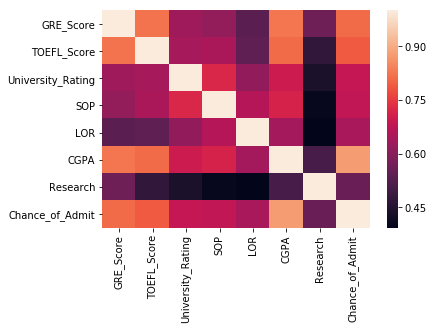

In [93]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [94]:
#admission_df.iloc[:,admission_df.columns != 'Chance_of_Admit'] = (admission_df.iloc[:,admission_df.columns != 'Chance_of_Admit'] - admission_df.iloc[:,admission_df.columns != 'Chance_of_Admit'].mean())/admission_df.iloc[:,admission_df.columns != 'Chance_of_Admit'].std()
# admission_df = (admission_df - admission_df.mean())/admission_df.std()

In [95]:
admission_df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,316.542222,107.162222,3.126667,3.361111,3.468889,8.577600,0.553333,0.720889
std,11.335705,6.023554,1.140254,0.993374,0.919432,0.599454,0.497701,0.141398
min,290.000000,92.000000,1.000000,1.000000,1.000000,7.200000,0.000000,0.340000
25%,308.250000,103.000000,2.000000,2.500000,3.000000,8.122500,0.000000,0.630000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Splitting data into train(80%) and validation(20%)

In [96]:
admission_train_X, admission_val_X, admission_train_Y, admission_val_Y = splitData(admission_df.iloc[:,admission_df.columns != 'Chance_of_Admit'], admission_df['Chance_of_Admit'], test_size=0.2)

## Q3-1 Implement a model using linear regression to predict the probablity of getting the admit

## helper Functions

In [100]:
# from sklearn.utils import check_arrays
def MSE(X, Y, theta):
    m = len(Y)
    return np.sum((np.dot(X, theta.T) - Y) ** 2)/(2 * m)

def MAE(X, Y, theta):
    m = len(Y)
    return np.sum(abs(np.dot(X, theta.T) - Y))/(m)

def MAPE(X, Y, theta):
    m = len(Y)
    return np.sum(np.abs((Y - np.dot(X, theta.T)) / Y)) * 1 /(m)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def printRegressionErrors(y, y_pred):
    mse = metrics.mean_squared_error(sigmoid(admission_val_Y), y_pred)  
    mae = metrics.mean_absolute_error(sigmoid(admission_val_Y), y_pred)
    mape = mean_absolute_percentage_error(sigmoid(admission_val_Y), y_pred)
    print("MSE : {0}".format(mse))
    print("MAE : {0}".format(mae))
    print("MAPE : {0}".format(mape))
    
def makeCoeffDF(coeffs):
    coeff_cols = ['GRE_Score', 'TOEFL_Score', 
                  'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Intercept']
    coeff_df = pd.DataFrame(coeffs, columns=coeff_cols)
    return coeff_df

In [124]:
class MyLinearRegressor:
    def __init__(self, cost_measure = MSE, learning_rate = 0.01, no_iterations = 1000):
        self.cost_measure = cost_measure
        self.cost_name = cost_measure.__name__
        self.alpha = learning_rate
        self.iterations = no_iterations
    
    def normalize_X(self, X):
        X_normalized = (X - self.X_mean)/self.X_var
        return X_normalized

    def normalize_Y(self, Y):
        return Y
        Y_normalized = (Y - self.Y_mean)/self.Y_var
        return Y_normalized
    
    def fit(self, X, Y):
        #### m = no of examples, n = no of features
        ### X : shape = mxn
        ### Y : shape = 1xm
        self.X_mean = X.mean()
        self.X_var = X.std()
        self.Y_mean = Y.mean()
        self.Y_var = Y.std()
        temp = list(X.columns.values)
        temp.append('Intercept')
        self.columns_X = temp
        
        X  = self.normalize_X(X)
        Y  = self.normalize_Y(Y)
        X_temp = X.values
        c = np.ones((1, len(X)))  ### shape = 1xm
        X_temp = np.concatenate((X, c.T), axis=1) ## Shape : mxn
        theta = np.zeros((1, len(X_temp[0]))) ## shape: 1 X n 
        Y_temp = Y.values.reshape(len(X),1)  ## shape : (m,1)
#         print(X_temp)
        theta, cost_hist = self.gradient_descent(theta, X_temp, Y_temp, self.alpha, self.iterations)
        print("final_cost {0}".format(cost_hist[-1]))
        self.theta = theta
        self.coef_ = theta.flatten()[:-1]
        self.cost_hist = cost_hist
        self.intercept_ = theta.flatten()[-1:]
#         print(theta)
    
    def predict(self, X):
        X = self.normalize_X(X)
        c = np.ones((1, len(X)))  ### shape = 1xm
        X_temp = np.concatenate((X, c.T), axis=1) ## Shape : kxn
        y_pred = np.dot(X_temp,self.theta.T)
#         y_pred = y_pred*self.Y_var + self.Y_mean
        return y_pred.flatten()
    
    def allCoeffs(self):
        coeffs = list(self.coef_) + list(self.intercept_)
        coeffs = np.array(coeffs).reshape(1, len(coeffs))
        return coeffs
    
    def plotCoeffsAndCost(self, theta_history, cost_history, iterations):
        x_values = range(iterations)
        theta_df = pd.DataFrame(theta_history, columns=self.columns_X)
        theta_df = theta_df.iloc[:,theta_df.columns != 'Intercept']
        # style
        ax = plt.subplot(2, 1, 1)
#         ax.set_style.use('seaborn-darkgrid')
        ax.figure.set_size_inches(10, 15)
#         ax.rcParams["figure.figsize"] = (10,15)

        # create a color palette
        palette = plt.get_cmap('Set1')

        # multiple line plot
        num=0
        for column in theta_df:
            num+=1
            ax.plot(x_values, theta_df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

        # Add legend
        ax.legend(loc=2, ncol=2)

        # Add titles
        ax.set_title("Coefficient Variation", loc='left', fontsize=12, fontweight=0, color='orange')
        ax.set_xlabel('iteration')
        ax.set_ylabel('Coefficients')
        
        ax1 = plt.subplot(2, 1, 2)
        ax1.plot(range(iterations), cost_history)
        ax1.set_xlabel('iteration')
        ax1.set_ylabel('cost')
        plt.show()
        
    def gradient_descent(self, theta, X, Y, alpha, iterations):
        cost_history = [0] * iterations
        theta_history = [0] * iterations
        m = len(Y)

        for iteration in range(iterations):
            # Hypothesis Values
            h = np.dot(X,theta.T) ## shape : (m,1)
            # Difference b/w Hypothesis and Actual Y
            if(self.cost_name == "MSE"):
                loss = h - Y ## shape: (m,1)
                # Gradient Calculation
                gradient = np.dot(X.T,loss) / m   ##shape : (n,1)
                # Changing Values of B using Gradient
                theta = theta - alpha * (gradient.T)
                
            elif(self.cost_name == "MAE"):
                loss = h - Y ## shape: (m,1)
                loss[loss >= 0] = 1
                loss[loss < 0] = -1
                gradient = np.dot(X.T,loss) / m  ##shape : (n,1)
                theta = theta - (alpha * (gradient.T))
                
            elif(self.cost_name == "MAPE"):
                loss = (h - Y) ## shape: (m,1)
                loss[loss >= 0] = 1
                loss[loss < 0] = -1
                gradient = np.dot((X/np.abs(Y)).T,loss) / m  ##shape : (n,1)
                theta = theta - alpha * (gradient.T)
            
            theta_history[iteration] = theta.flatten()
            cost = self.cost_measure(X, Y, theta)
#             print(cost)
            cost_history[iteration] = cost
#             print("i: {0}".format(iteration), sep=" ")
#             print("theta: {0}".format(theta), sep= " ")
#             print("cost: {0}".format(cost))
#         print(theta_history)
        self.plotCoeffsAndCost(theta_history, cost_history, iterations)
        return theta, cost_history

## Q3-1 Compare the performance of Mean square error loss function vs Mean Absolute error function vs Mean absolute percentage error function

## MSE

In [125]:
lr = MyLinearRegressor(MSE, 0.01, 1000)

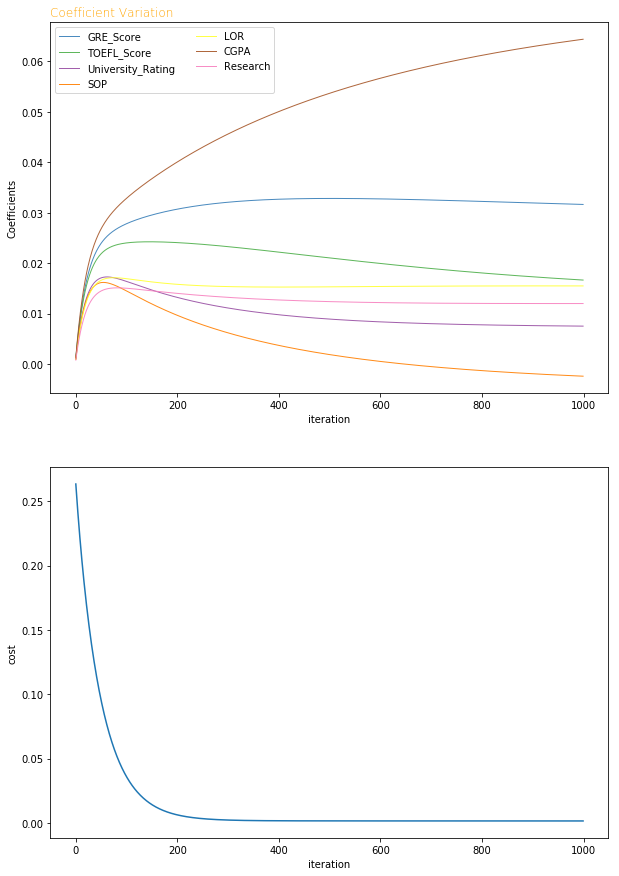

final_cost 0.0015960895932451058


In [126]:
lr.fit(admission_train_X, admission_train_Y)

### Coefficients

In [127]:
makeCoeffDF(lr.allCoeffs())

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.031648,0.016654,0.007519,-0.002409,0.015492,0.064407,0.011997,0.720302


In [128]:
y_pred = lr.predict(admission_val_X)

### R2Score

In [129]:
metrics.r2_score(admission_val_Y, y_pred)  

0.7316390661254415

## MAE

In [130]:
lr = MyLinearRegressor(MAE, 0.01, 1000)

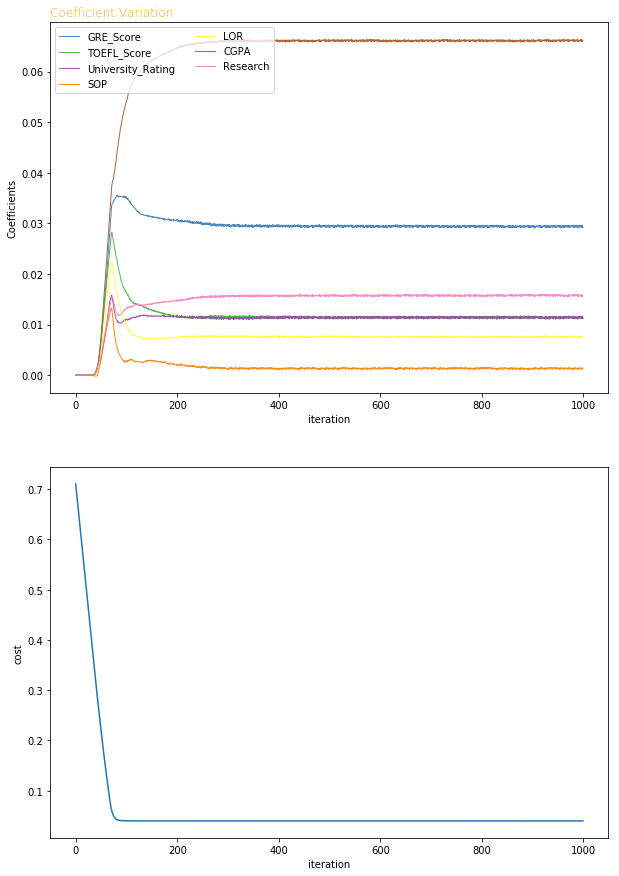

final_cost 0.03986341104960594


In [131]:
lr.fit(admission_train_X, admission_train_Y)

In [132]:
makeCoeffDF(lr.allCoeffs())

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.029212,0.011194,0.011226,0.001271,0.007518,0.066044,0.015586,0.729278


In [133]:
y_pred = lr.predict(admission_val_X)

### R2Score

In [134]:
metrics.r2_score(admission_val_Y, y_pred)

0.7241676489871202

## MAPE

In [135]:
lr = MyLinearRegressor(MAPE, 0.01, 1000)

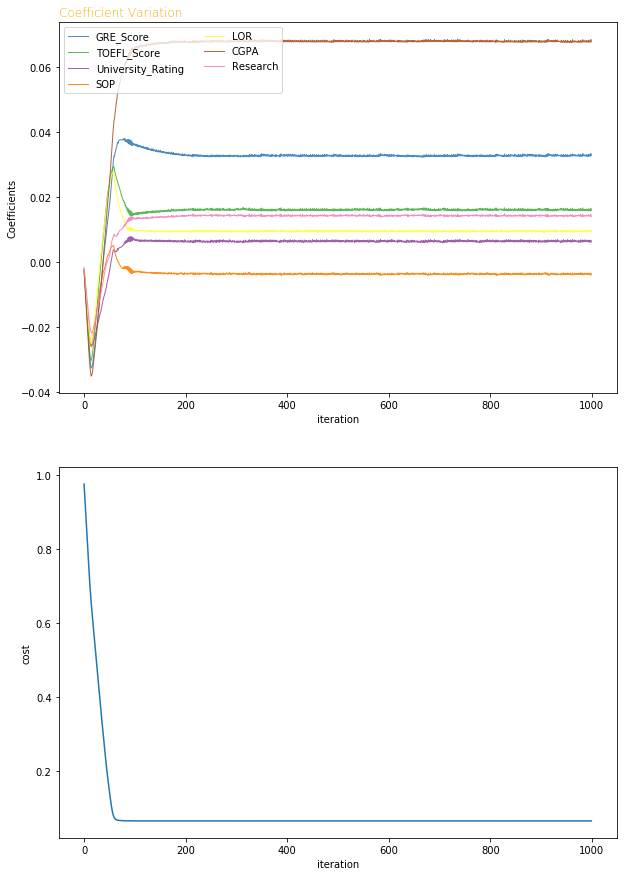

final_cost 0.0646972344181821


In [136]:
lr.fit(admission_train_X, admission_train_Y)

In [137]:
makeCoeffDF(lr.allCoeffs())

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.032785,0.015833,0.006207,-0.003936,0.009447,0.067727,0.014074,0.724906


In [138]:
y_pred = lr.predict(admission_val_X)

### R2Score

In [139]:
#mean_absolute_percentage_error(admission_val_Y, y_pred)
metrics.r2_score(admission_val_Y, y_pred)

0.7203023445803693

## Observations:
1. All converge smoothly as they functions value converges smoothly, due to the loss function being of the form (y_pred - y)^x

# Q3-3 Analyse and report the behaviour of the coefficients

### Residual Plots for all the features

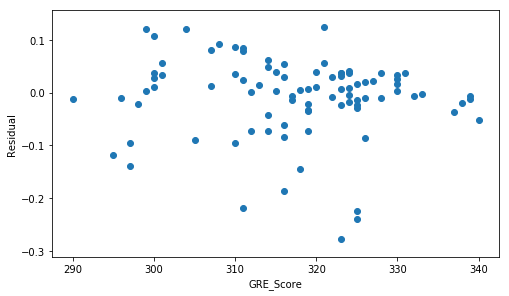

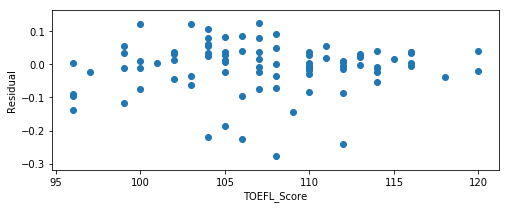

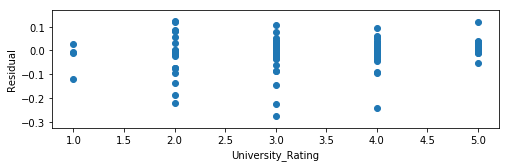

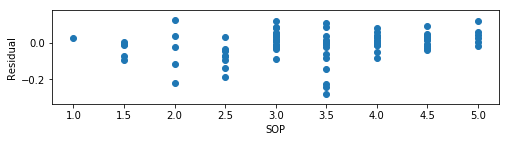

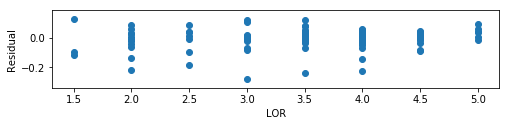

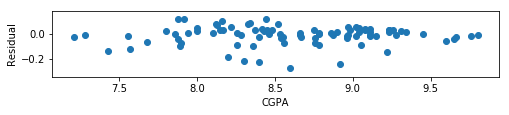

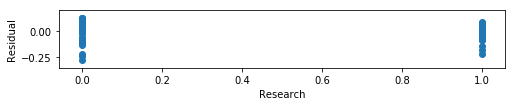

In [117]:
residual = (admission_val_Y - y_pred)
# print(len(admission_val_X[0]))
for i in range(admission_val_X.shape[1]):
    ax = plt.subplot(i+2,1,i+1)
    ax.figure.set_size_inches(8,10)
    ax.scatter(admission_val_X.iloc[:,i], residual)
    ax.set_xlabel(admission_val_X.columns[i])
    ax.set_ylabel('Residual')
    plt.show()

### Coefficients

In [140]:
makeCoeffDF(lr.allCoeffs())

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.032785,0.015833,0.006207,-0.003936,0.009447,0.067727,0.014074,0.724906


### Observations:
1. Since the residuals are denser towards zero, the model seems to be a good fit.
2. Also since the residuals do not form any visible pattern, there is no need to transform the dependent/independent variables.
3. CGPA seems to be the dominant feature, ie, change in unit of CGPA affects the prediction the most when all the other features are constant.

### Behavior of coefficients
1. The sign of the coefficient indicates the direction of correlation of the features with the output, directly proportional if sign is +, else inversely proportinal
2. Magnitude indicates how much the output changes with a unit increase of the respective feature assuming rest all features are constant

# Linear Regression using sklearn

In [119]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize = True).fit(admission_train_X, admission_train_Y)
# reg.score(X, y)

print(reg.coef_, reg.intercept_)

y_pred_sklearn = reg.predict(admission_val_X)
# y_pred_sklearn

[ 0.00254584  0.00219129  0.00631208 -0.00453849  0.01639922  0.11992619
  0.02468493] -1.4226270486360575


In [120]:
metrics.r2_score(admission_val_Y,y_pred_sklearn)

0.7291388231918341

# PART - 4 Logistic Regression

## Splitting Data into Train and Validation

In [ ]:
admission_df['Chance_of_Admit'] = [1 if x >= 0.5 else 0 for x in admission_df['Chance_of_Admit']]

In [ ]:
admission_df.describe()

In [ ]:
admission_train_X, admission_val_X, admission_train_Y, admission_val_Y = splitData(admission_df.iloc[:,admission_df.columns != 'Chance_of_Admit'], admission_df['Chance_of_Admit'], test_size=0.2)

In [ ]:
class MyLogisticRegresson:
    def __init__(self, learning_rate = 0.01, no_iterations = 1000 ,threshold = 0.5):
        self.alpha = learning_rate
        self.iterations = no_iterations
        self.threshold = threshold
    
    def normalize_X(self, X):
        X_normalized = (X - self.X_mean)/self.X_var
        return X_normalized

    def normalize_Y(self, Y):
#         return X
        Y_normalized = (Y - self.Y_mean)/self.Y_var
        return Y_normalized
    
    def fit(self, X, Y):
        #### m = no of examples, n = no of features
        ### X : shape = mxn
        ### Y : shape = 1xm
        self.X_mean = X.mean()
#         print("mean: {0}",self.X_mean)
        self.X_var = X.std()
        self.Y_mean = Y.mean()
        self.Y_var = Y.std()
        
        X  = self.normalize_X(X)
#         Y  = self.normalize_Y(Y)
        c = np.ones((1, len(X)))  ### shape = 1xm
        X_temp = np.concatenate((X, c.T), axis=1) ## Shape : mxn
        theta = np.zeros((1, len(X_temp[0]))) ## shape: 1 X n 
        Y_temp = Y.values.reshape(len(X),1)  ## shape : (m,1)
#         print(X_temp)
#         print("X : {0}, theta : {1}, Y : {2}".format(X_temp.shape, theta.shape, Y_temp.shape))
        theta, cost_hist = self.gradient_descent(theta, X_temp, Y_temp, self.alpha, self.iterations)
        self.theta = theta
        self.coef_ = theta.flatten()[:-1]
        self.cost_hist = cost_hist
        self.intercept_ = theta.flatten()[-1:]
#         print(theta)
    
    def predict_probs(self, X):
        X = self.normalize_X(X)
        c = np.ones((1, len(X)))  ### shape = 1xm
        X_temp = np.concatenate((X, c.T), axis=1) ## Shape : kxn
        y_pred = np.dot(X_temp,self.theta.T)
        return sigmoid(y_pred.flatten())
    
    def predict(self, X):
        y_probs = self.predict_probs(X)
        y_probs[y_probs >= self.threshold] = 1
        y_probs[y_probs < self.threshold] = 0
        return y_probs
    
    def allCoeffs(self):
        coeffs = list(self.coef_) + list(self.intercept_)
        coeffs = np.array(coeffs).reshape(1, len(coeffs))
        return coeffs
    
    def __loss(self, Y, h):
        h1 = h.copy()
        h1[h1 == 0] = 1
        h2 = h.copy()
        h2[h2 == 1] = 0
        return np.mean(-Y * np.log(h1) - (1 - Y) * np.log(1 - h2))
        
    def gradient_descent(self, theta, X, Y, alpha, iterations):
        cost_history = [0] * iterations
        m = len(Y)

        for iteration in range(iterations):
            # Hypothesis Values
#             print(theta)
#             print(X.shape, theta.T.shape)
            zz = np.dot(X,theta.T)
#             print(zz)
            h = sigmoid(zz) ## shape : (m,1)
            
            loss = h - Y ## shape: (m,1)
#             print("loss: {0}".format(loss.shape))
#             print("loss : {0}".format(np.sum(loss)))
            # Gradient Calculation
            gradient = np.dot(X.T,loss) / m   ##shape : (n,1)
#             print("grad: {0}".format(gradient.shape))
            # Changing Values of B using Gradient
            theta = theta - alpha * (gradient.T)
#             print(theta.shape)
            # New Cost Value
            cost = self.__loss(Y, h)
            cost_history[iteration] = cost
#             print("i: {0}".format(iteration), sep=" ")
#             print("theta: {0}".format(theta), sep= " ")
#             print("cost: {0}".format(cost))
#             print(cost, theta)
        
        ax = plt.subplot(1,1,1)
        ax.plot(range(iterations), cost_history)
        ax.set_xlabel('iteration')
        ax.set_ylabel('cost')
        plt.show()

        return theta, cost_history

In [ ]:
threshold = 0.5
lr = MyLogisticRegresson(0.01, 10000)
lr.fit(admission_train_X,admission_train_Y)

In [ ]:
y_pred = lr.predict(admission_val_X)
y_pred

In [ ]:
makeCoeffDF(lr.allCoeffs())

In [ ]:
metrics.accuracy_score(admission_val_Y, y_pred)

## sklearn Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(admission_train_X, admission_train_Y)
y_pred = clf.predict(admission_val_X)
print(y_pred)
print(clf.coef_)
print(clf.intercept_)
metrics.accuracy_score(admission_val_Y, y_pred)

# PART 4 - 2

In [ ]:
admission_train_X.head()

In [ ]:
myKNN = KNN(n_neighbors=5, metric=euclidean)
myKNN.fit(admission_train_X, admission_train_Y)

In [ ]:
y_pred = myKNN.predict(admission_val_X)

In [ ]:
metrics.accuracy_score(admission_val_Y, y_pred)

# PART 4 - 3

In [133]:
precisions = []
recalls = []
thresholds = [i/50 for i in range(0,50)]
for threshold in thresholds:
    lr = MyLogisticRegresson(0.1, 500, threshold)
    lr.fit(admission_train_X,admission_train_Y)  
    y_pred = lr.predict(admission_val_X)
    precisions.append(metrics.precision_score(y_pred=y_pred, y_true=admission_val_Y))
    recalls.append(metrics.recall_score(y_pred=y_pred, y_true=admission_val_Y))
    
ax = plt.subplot(2, 1, 1)
# plt.style.use('seaborn-darkgrid')
ax.figure.set_size_inches(10,15)

# create a color palette
palette = plt.get_cmap('Set1')
ax.plot(thresholds, precisions, marker='', color=palette(0), linewidth=1, alpha=0.9, label='precision')
ax.plot(thresholds, recalls, marker='', color=palette(1), linewidth=1, alpha=0.9, label='recall')

# Add legend
ax.legend(loc=2, ncol=2)

# Add titles
# ax.set_title("Precision and Recall variation", loc='left', fontsize=12, fontweight=0, color='orange')
ax.set_xlabel('threshold')
ax.set_ylabel('metrics')
plt.show()

NameError: name 'MyLogisticRegresson' is not defined

# PART - 5

## Reading Input Data

In [ ]:
wine_df_orig = pd.read_csv("./wine-quality/data_changed.csv", header=None)

## One vs All

In [ ]:
wine_df_orig.describe()

In [ ]:
df_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [ ]:
wine_df_orig.columns = df_cols

In [ ]:
wine_df_orig.head()

In [ ]:
wine_df_orig.describe()

In [ ]:
wine_df_orig.quality.value_counts()

### Test - Validation Split

In [ ]:
wine_train_X, wine_val_X, wine_train_Y, wine_val_Y = splitData(wine_df_orig.iloc[:,wine_df_orig.columns != 'quality'], wine_df_orig['quality'], test_size=0.2)

In [ ]:
wine_train_X.describe()

In [ ]:
wine_train_Y.value_counts()

## One vs ALL

In [ ]:
len(wine_train_Y)

In [ ]:
lr = MyLogisticRegresson(0.1, 500)
y_temp = wine_train_Y.copy()
y_temp[y_temp != 5] = 0
y_temp[y_temp == 5] = 1
y_val_temp = wine_val_Y.copy()
y_val_temp[y_val_temp != 5] = 0
y_val_temp[y_val_temp == 5] = 1
y_val_temp.value_counts()
lr.fit(wine_train_X,y_temp)  
y_pred = lr.predict(wine_val_X)
# print("probs: {0}".format(y_pred))

In [ ]:
metrics.accuracy_score(y_val_temp, y_pred)

In [ ]:
y_pred_final = np.array([0 for i in range(len(wine_val_Y))])
y_pred_prob_final = np.array([0 for i in range(len(wine_val_Y))])
for class_val in range(3,10):
    print(class_val)
    lr = MyLogisticRegresson(0.1, 500)
    y_temp = wine_train_Y.copy()
    y_temp[y_temp != class_val] = 0
    y_temp[y_temp == class_val] = 1
    y_val_temp = wine_val_Y.copy()
    y_val_temp[y_val_temp != class_val] = 0
    y_val_temp[y_val_temp == class_val] = 1
#     print(y_temp.value_counts())
    lr.fit(wine_train_X,y_temp)  
    y_pred = lr.predict_probs(wine_val_X)
#     print(y_pred)
#     print(y_pred_prob_final)
    y_pred_bool = (y_pred > y_pred_prob_final)
#     print(y_pred_bool)
    y_pred_final[y_pred_bool] = class_val
#     print(y_pred_bool)
    print(y_pred)
    y_pred_prob_final[y_pred_bool] = y_pred
    print(y_pred_prob_final)

In [ ]:
y_pred_final

In [ ]:
metrics.accuracy_score(wine_val_Y, y_pred_final)

In [ ]:
s = pd.Series([0, 1, 2, 3, 4])
s = s.replace(0, 5)
s
